Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Make sure that in addition to the code, you provide written answers for all questions of the assignment. 

## Assignment 2 - Data Analysis using Pandas
**(15 points total)**

For this assignment, we will analyze the open dataset with data on the passengers aboard the Titanic.

The data file for this assignment can be downloaded from the Kaggle website: https://www.kaggle.com/c/titanic/data, file `train.csv`. It is also attached to the assignment page. The definition of all variables can be found on the same Kaggle page, in the Data Dictionary section.

Read the data from the file into a pandas DataFrame. Analyze, clean, and transform the data to answer the following question: 

**What categories of passengers were most likely to survive the Titanic disaster?**

**Question 1.**  _(3 points)_
* The answer to the main question - What categories of passengers were most likely to survive the Titanic disaster?
* The detailed explanation of the logic of the analysis.

**Question 2.**  _(4 points)_
* What attributes did you use for the analysis? Explain how you used them and why you decided to use them. 
* Did you engineer any attributes (create new attributes)? If yes, explain the rationale and how the new attributes were used in the analysis. Provide a complete list of all attributes used.
* If you have excluded any attributes from the analysis, provide an explanation of why you believe they can be excluded.

**Question 3.**  _(4 points)_
* How did you treat missing values for those attributes that you included in the analysis (for example, the `age` attribute)? Provide a detailed explanation.

**Questions on Quercus.**  _(4 points)_


***

# Quercus Quiz

<div style="font-size:20px"><b>Overarching Question: </b><em>What categories of passengers were most likely to survive the Titanic disaster?</em></div>
&#9745; Age
<br>&#9745; Sex
<br>&#9745; Pclass
<br>&#9744; Cabin
<br>&#9745; Embarked
<br>&#9744; Fare

In [1]:
import numpy as np  # For computations
import pandas as pd  # For indexing our data

np.random.seed(12345)
import matplotlib.pyplot as plt  # for visualizing our data
plt.style.use('fivethirtyeight')

In [2]:
data = pd.read_csv('train.csv')

In [3]:
# Correlation between Survived column and all other columns
# Because all correlation are <0.80 or >-0.80, they are not considered significant
# But, there is a negative relationship between class, age, and whether you have a sibling on board
# There is a slight positive relationship between surviving Titanic and if you're a parent/child on board
data.corrwith(data['Survived'])

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
dtype: float64

#### Age, proportion of survived v. total

In [4]:
dropped_na_age = data # Don't want to remove rows w/ data
dropped_na_age.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [5]:
dropped_na_age.dropna(subset=['Age'], inplace=True)

In [6]:
dropped_na_age.count()

PassengerId    714
Survived       714
Pclass         714
Name           714
Sex            714
Age            714
SibSp          714
Parch          714
Ticket         714
Fare           714
Cabin          185
Embarked       712
dtype: int64

In [7]:
# Making a histogram!
dropped_na_age['Age'].nsmallest(n=10)
# The numbers in the first column/index are the passenger ID

803    0.42
755    0.67
469    0.75
644    0.75
78     0.83
831    0.83
305    0.92
164    1.00
172    1.00
183    1.00
Name: Age, dtype: float64

In [8]:
# According to Kaggle, age is a fraction if less than 1
# There are people who are 40.5, 70.5, etc.
# So I'll just round up for simplicity
dropped_na_age['Age'] = dropped_na_age['Age'].apply(np.ceil)

In [9]:
dropped_na_age['Age'].nsmallest(n=10)
# The numbers in the first column/index are the passenger ID

78     1.0
164    1.0
172    1.0
183    1.0
305    1.0
381    1.0
386    1.0
469    1.0
644    1.0
755    1.0
Name: Age, dtype: float64

In [10]:
# Identify how many bins/unique ages in data
# This will tell us how many bins to use in histogram
dropped_na_age['Age'].nunique()

70

In [11]:
# Total number of people who survived and has an age value
survived_by_age = dropped_na_age[dropped_na_age['Survived'] == 1]
survived_by_age['Age'].count()

290

In [12]:
# Total number of people who died and has an age value
dead_by_age = dropped_na_age[dropped_na_age['Survived'] == 0]
dead_by_age['Age'].count()

424

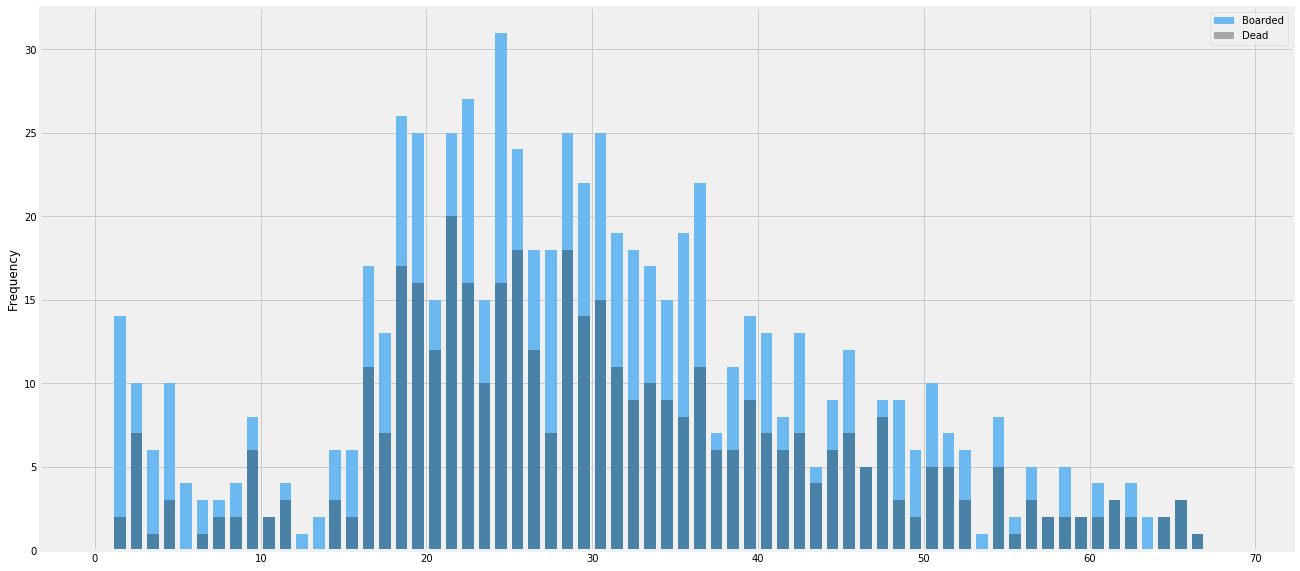

In [13]:
plt.figure(figsize=(20,10))
dropped_na_age['Age'].plot.hist(alpha=1,color='#6bb9f0', bins=range(70), rwidth=0.7) # bins=range(70) to make it left aligned
dead_by_age['Age'].plot.hist(alpha=0.3,color='black',bins=range(70), rwidth=0.7) # rwidth=0.70 is the space between the bars
plt.legend(['Boarded','Dead'])
# plt.savefig('myplot.png')

In [14]:
# I really wanted to make a 100% stacked histogram on this but ran out of time
# Here's what I got so far though!

dropped_na_age = data # Don't want to remove rows w/ data
dropped_na_age.dropna(subset=['Age'], inplace=True)
dropped_na_age['Age'] = dropped_na_age['Age'].apply(np.ceil)
frequencies = dropped_na_age['Age'].value_counts().to_frame().reset_index().rename(columns={'index':'Age','Age':'Boarded'})
frequencies.set_index('Age')

,Boarded
Age,
24.0,31
22.0,27
18.0,26
28.0,25
19.0,25
...,...
66.0,1
53.0,1
80.0,1


In [15]:
# Replace the ages of all those who died with 0
dead_by_age = np.where(dropped_na_age.Survived==0,0,dropped_na_age.Age)

In [16]:
# Export dead_by_age to a new dataframe
survived = pd.DataFrame(data=dead_by_age,
       index=np.arange(1,715),
       columns=['Survived'])

In [17]:
# Count number of occurences in dead_by_age 
# Where dead if age = 0 and lived = age > 0
survived_dataframe = survived['Survived'].value_counts().to_frame()

In [18]:
frequencies = survived_dataframe.merge(frequencies, left_index=True, right_on='Age', how='outer')

In [19]:
frequencies['Percentage_Survived'] = frequencies['Survived'] / frequencies['Boarded']

In [20]:
frequencies.dropna(axis='rows', inplace=True)
frequencies.sort_values(by=['Age'], inplace=True)
frequencies['Percentage_Died'] = 1 - frequencies['Percentage_Survived']
frequencies.set_index('Age')

,Survived,Boarded,Percentage_Survived,Percentage_Died
Age,,,,
1.0,12.0,14.0,0.857143,0.142857
2.0,3.0,10.0,0.300000,0.700000
3.0,5.0,6.0,0.833333,0.166667
4.0,7.0,10.0,0.700000,0.300000
5.0,4.0,4.0,1.000000,0.000000
6.0,2.0,3.0,0.666667,0.333333
7.0,1.0,3.0,0.333333,0.666667
8.0,2.0,4.0,0.500000,0.500000
9.0,2.0,8.0,0.250000,0.750000


#### Sex, proportion of survived v. total

In [21]:
# What proportion of female/male survived?
by_sex = data.groupby('Sex')['Survived'].sum() / data.groupby('Sex')['Name'].count()
by_sex = by_sex.map('{:.2f}'.format)
by_sex

Sex
female    0.75
male      0.21
dtype: object

#### Class, proportion of survived v. total

In [22]:
# SUM to give me total number of people who survived per socio-economic class
data.groupby('Pclass')['Survived'].sum()

Pclass
1    122
2     83
3     85
Name: Survived, dtype: int64

In [23]:
# COUNT to give me total number of people per socio-economic class
data.groupby('Pclass')['Name'].count()

Pclass
1    186
2    173
3    355
Name: Name, dtype: int64

In [24]:
# What proportion of each socio-economic class survived? 
# Formatted Series float into percentages
survived_per_class = data.groupby('Pclass')['Survived'].sum() / data.groupby('Pclass')['Name'].count()
survived_per_class = survived_per_class.map('{:.2f}'.format)
survived_per_class

Pclass
1    0.66
2    0.48
3    0.24
dtype: object

#### Cabin, proportion of survived v. total

In [25]:
# Drop rows with missing Cabin number
cabins = data[data['Cabin'].notna()]

In [26]:
# Create new column with the Cabin letter
cabins['Letter'] = cabins['Cabin'].str.get(0)

C:\Users\Fani\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [27]:
# What's the proportion of survivors in each Cabin letter?
by_cabins = cabins.groupby('Letter')['Survived'].sum() / cabins.groupby('Letter')['Name'].count()

In [28]:
# About 55% of people with a Cabin number survived
by_cabins.mean()

0.5673445795718093

In [29]:
# It appears cabin letters D, E, B, F, and C have a greater proportion of people survived
by_cabins = by_cabins.map('{:.2f}'.format)
by_cabins.sort_values(ascending=False)

Letter
B    0.76
D    0.74
E    0.73
F    0.64
C    0.59
A    0.58
G    0.50
T    0.00
dtype: object

#### Embarked, proportion of survived v. total

In [30]:
# Does where the passenger embark matter?
# Where C = Cherboug, Q = Queenstown, and S = Southampton
by_embarked = data[data['Embarked'].notna()]
by_embarked = by_embarked.groupby('Embarked')['Survived'].sum() / by_embarked.groupby('Embarked')['Name'].count()

In [31]:
by_embarked.mean()

0.41874082596104256

In [32]:
by_embarked = by_embarked.map('{:.2f}'.format)
by_embarked

Embarked
C    0.61
Q    0.29
S    0.36
dtype: object

#### Fare, proportion of survived v. total

In [33]:
# Taking a page from this tutorial https://www.learndatasci.com/tutorials/predicting-housing-prices-linear-regression-using-python-pandas-statsmodels/
# Let's find out what the correlation is between $ spent on fare and chance of surviving the Titanic
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [34]:
ols_survived = data['Survived']
ols_fare = data['Fare']
by_fare = ols('ols_survived ~ ols_fare',data=data).fit()

In [35]:
# WELL. Assuming the logic is correct and I'm using the variables properly.....
# According to Adj. R-squared, Fare only explains 6.5% of the likelihood to survive
# One unit increase in Fare reduces likelihood to survive by 30.27%
# In other words, although fare could be a good predictor of survival (proxy for class?), there are
# better attributes that explains more of the chance of survival than the amount spent on fare
by_fare.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ols_survived   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     55.18
Date:                Sun, 15 Mar 2020   Prob (F-statistic):           3.16e-13
Time:                        23:03:23   Log-Likelihood:                -478.77
No. Observations:                 714   AIC:                             961.5
Df Residuals:                     712   BIC:                             970.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3197      0.021     15.078      0.000       0.278       0.361
ols_fare       0.0025      0.000      7.428      0.000       0.002       0.003
==============================================================================
Omnibus:                     3976.119   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.844
Skew:                           0.409   Prob(JB):                     2.09e-22
Kurtosis:                       1.361   Cond. No.                         75.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<div style="font-size:20px"><b>Question 1: </b><em>What attributes have missing data?</em></div> 

In [36]:
data = pd.read_csv('train.csv')
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<div style="font-size:20px"><b>Question 2: </b><em>What was the average (mean) age of the passengers on board the Titanic?</em></div> 

In [37]:
# Mean age of all 891 people in the train.csv dataset
data['Age'].mean()

29.69911764705882

In [38]:
# Only 715 people have ages listed
data['Age'].count()

714

In [39]:
# Total of all known ages
data['Age'].sum()

21205.17

In [40]:
# Average = total of all ages / number of people with ages recorded
data['Age'].sum() / data['Age'].count()

29.69911764705882

<div style="font-size:20px"><b>Question 3: </b><em>What was the percentage of female passengers who survived?</em> </div><div style="font-size:14px">
(out of all female passengers who traveled on Titanic). Enter the answer as a number without the percent sign. For example, if you calculate that 56% out of all female passengers survived, enter 56. You can enter the number as a floating-point number with two decimals.</div>

In [41]:
# Total female passengers on board = 314
total_boarded = data.groupby('Sex').size()
total_boarded['female']

314

In [42]:
# Total females that survived
females_survived = ((data['Survived'] > 0) & (data['Sex']=='female')).sum()
females_survived

233

In [43]:
# Percentage of female survived over total female boarded
females_survived / total_boarded['female']

0.7420382165605095

In [44]:
# What proportion of female/male survived? Another method
by_sex = data.groupby('Sex')['Survived'].sum() / data.groupby('Sex')['Name'].count()
by_sex

Sex
female    0.742038
male      0.188908
dtype: float64

<div style="font-size:20px"><b>Question 4: </b><em>What was the percentage of male passengers who survived?</em></div><div style="font-size:14px">(out of all male passengers who traveled on Titanic). As above, enter the answer as a number without the percent sign. For example, if you calculate that 56% out of all male passengers survived, enter 56. You can enter the number as a floating-point number with two decimals. </div>

In [45]:
# What male passengers survived?
by_sex = data.groupby('Sex')['Survived'].sum() / data.groupby('Sex')['Name'].count()
by_sex

Sex
female    0.742038
male      0.188908
dtype: float64

In [46]:
by_sex = by_sex.map('{:2f}'.format)
print(by_sex['male'])

0.188908


<br><div style="font-size:20px"><b>Question 5: </b><em>How many passengers traveling 1st class survived?</em> <div style="font-size:14px"> (looking for a number, not a percentage)</div>

In [47]:
class_survival = data.groupby('Pclass')['Survived'].sum()
class_survival.iloc[:1]

Pclass
1    136
Name: Survived, dtype: int64

<div style="font-size:20px"><b>Question 6: </b><em>How many passengers traveling 2nd class survived? </em></div><div style="font-size:14px"> (a number, not a percentage)</div>

In [48]:
class_survival = data.groupby('Pclass')['Survived'].sum()
class_survival.iloc[1:2]

Pclass
2    87
Name: Survived, dtype: int64

<div style="font-size:20px"><b>Question 7: </b><em>How many passengers traveling 3rd class survived?</em> </div><div style="font-size:14px"> (a number)</div>

In [49]:
class_survival = data.groupby('Pclass')['Survived'].sum()
class_survival.iloc[2:3]

Pclass
3    119
Name: Survived, dtype: int64

<div style="font-size:20px"><b>Question 8: </b><em>What categories of passengers were most likely to survive the Titanic disaster?</em> </div>

From common knowledge and watching Leonardo DiCaprio on screen, we know that women and children were the first ones to get on a lifeboat and therefore were most likely to survive. The categories then are <b>gender and age</b> and the proportion of people who survived reflects this.

Thse in upper class (<b>pclass</b>=1) were more likely to survive than those in the middle and lower socio-economic classes.

According to the Kaggle discussion, cabin letters correspond to the level in the ship where first class stayed in levels A to E, second class in D to F, and third class in E to G. Funny enough, my quick calculations found that those in A and G were the least likely to survive. 

Those <b>embarking</b> from Cherboug (Embarked = C) were most likely to survive, interestingly enough. This might be because more high-status or women/children boarded in Cherboug. 

The regression on Fare and likelihood to survive was inconclusive. 

<div style="font-size:20px"><b>Question 9a: </b><em>What attributes did you use for the analysis?</em></div> <div style="font-size:14px">Explain how you used them and why you decided to use them.</div>

I examined <code>Pclass</code>, <code>Sex</code>, <code>Age</code>, <code>Fare</code>, <code>Cabin</code>, and location <code>Embarked</code> because those were the attributes given and the type of data I can work with (using my current level of skill). 

<div style="font-size:20px"><b>Question 9b: </b><em>Did you engineer any attributes (create new attributes)? </em></div><div style="font-size:14px">If yes, explain the rationale and how the new attributes were used in the analysis. Provide a complete list of all attributes used.
If you have excluded any attributes from the analysis, provide an explanation of why you believe they can be excluded.</div>

I didn't engineer any <em>new</em> attributes, just cleaned/manipulated the existing ones. For example, anyone under 1 year old is given a fractional age so I grouped it all in age = 1. For cabin, I just took the first letter occuring in the column. 

I didn't use <code>Name</code>, <code>Passenger ID</code>, <code>SibSp</code>, and <code>Parch</code>. Passenger ID doesn't really tell me much unless I learn the system of how the Passenger ID was issued and find a correlation between the ID and the ticket-holder. I didn't use Sibsp and Parch due to its complexity. I don't know how to relate that to the data or run a regression with this information, and it seems out of scope in the context of this introductory course assignment. I didn't use Ticket because like Passenger ID, there doesn't seem to be a sensible pattern. 

<div style="font-size:20px"><b>Question 10: </b><em>How did you treat missing values for those attributes that you included in the analysis (for example, the age attribute)? </em></div><div style="font-size: 14px">Provide a detailed explanation.</div>

I dropped/ignored the rows with the missing values. I choose to ignore it because I am assuming my sample data is close enough to the sample of respondents and nonrespondents with corresponding proportions. I didn't want to fill in missing values with a mean/median/mode because it could distort the data or challenging to find the mean for, especially if the items are categorical like pclass, embarked and sex. 